## Import necessary libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
company_data = pd.read_csv('Company_Data (1).csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data understanding

In [3]:
company_data.shape

(400, 11)

In [4]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

## Convert sales into categories

In [6]:
company_data['Sales'].nunique()

336

In [7]:
company_data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [11]:
company_data['Sales'] = pd.cut(company_data.Sales, bins=3, labels=np.arange(3), right=False)
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,Good,33,14,Yes,Yes
396,1,139,23,3,37,120,Medium,55,11,No,Yes
397,1,162,26,12,368,159,Medium,40,18,Yes,Yes
398,1,100,79,7,284,95,Bad,50,12,Yes,Yes


In [12]:
company_data2 = company_data.copy()

## Label encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
company_data2 ['Sales']    = le.fit_transform(company_data2['Sales'])
company_data2['ShelveLoc'] = le.fit_transform(company_data2['ShelveLoc'])
company_data2['Urban']     = le.fit_transform(company_data2['Urban'])
company_data2['US']        = le.fit_transform(company_data2['US'])

In [20]:
company_data2.dtypes

Sales          int64
CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int64
Age            int64
Education      int64
Urban          int64
US             int64
dtype: object

In [22]:
X = company_data2.drop('Sales',axis=1)
y = company_data2[['Sales']]

## Standard scalar

In [26]:
from sklearn.preprocessing import StandardScaler

In [31]:
std_scale = StandardScaler()
scaled_X = std_scale.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=X.columns)

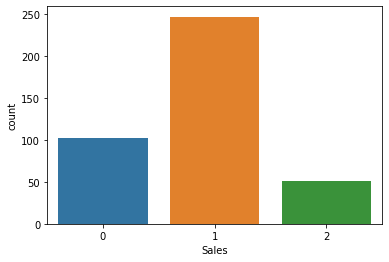

In [40]:
sns.countplot(x='Sales',data=company_data2)
plt.show()

### Observation

#### output data is imbalance

## Data spliting

In [35]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state=12,stratify=y)

In [42]:
X_train.shape,y_train.shape

((320, 10), (320, 1))

In [43]:
X_test.shape,y_test.shape

((80, 10), (80, 1))

## Model Training | Testing | Evaluation

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [74]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

print('accuracy score       :',round(accuracy_score(y_test,y_pred),4))
print('precision score      :',round(precision_score(y_test,y_pred,average='micro'),4))
print('recall score         :',round(recall_score(y_test,y_pred,average='micro'),5))
print('confusion matrix     :\n',confusion_matrix(y_test,y_pred))

accuracy score       : 0.675
precision score      : 0.675
recall score         : 0.675
confusion matrix     :
 [[12  7  1]
 [10 39  1]
 [ 0  7  3]]


## Tune Decision tree using gridsearch cv

In [69]:
from sklearn.model_selection import GridSearchCV

In [75]:
grid_cv = GridSearchCV(estimator=dt_model,param_grid={
        "criterion":["gini", "entropy"],
        "max_depth":range(3,7)
},cv=5)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 7)})

In [76]:
grid_cv.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [82]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

print('accuracy score       :',round(accuracy_score(y_test,y_pred),4))
print('precision score      :',round(precision_score(y_test,y_pred,average='micro'),4))
print('recall score         :',round(recall_score(y_test,y_pred,average='micro'),5))
print('confusion matrix     :\n',confusion_matrix(y_test,y_pred))

accuracy score       : 0.6875
precision score      : 0.6875
recall score         : 0.6875
confusion matrix     :
 [[ 9 11  0]
 [ 9 41  0]
 [ 0  5  5]]


## ============================End===========================================